# Homework 2

### Using the data from the SDSS catalog, and Python tools (e.g., matplotlib, numpy), make the analog of [Belokurov et al. 2006](http://iopscience.iop.org/1538-4357/642/2/L137/pdf/20450.web.pdf) "Field of streams" figure (Figure 1 in the paper) encompassing all DR12 data. Specifically:

* Write a query (either SQL or for LSD) to select stars satisfying the   color selection criterion (see Section 2 of Belokurov et al. 2006). You're free to either run this query against the CasJobs SDSS database, or the LSD copy of the database.
* Write Python code to divide the stars into the three r-band magnitude bins (see the paper and/or the figure caption for magnitude bin specification), and bin them into 0.5 deg x 0.5 deg pixels. You may find numpy.histogram2d helpful.
* Use matplotlib.imshow (or any other Python library of your choice) to create an RGB color composite equivalent of Figure 1. from the paper (see the figure caption for details)


The star data was retrieved from CASJobs using the following query:
>`select
ra, dec, r
into mydb.MyTable2d from Star
where g-r < 0.4 and dec > -10 and dec < 60 and ra > 110 and ra < 230`

Because of the file size limit on the CASJobs server, the query results had to be split up into multiple files. Here I read them in and stitch them together into one table:

In [46]:
from astropy.table import Table, vstack
import glob

pathToFitsTables = '/astro/users/scw7/Dropbox/Classwork/ast597b/hw2/sagStreamData/*'
paths = glob.glob(pathToFitsTables)
tables = []
for path in paths:
    tables.append(Table.read(path))
    
table = vstack(tables)

Plot the stars

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

binSize = 0.5 # degrees

binDistX = np.arange(110, 230.+binSize, binSize)
binDistY = np.arange(-10, 60.+binSize, binSize)

tabler = table[(table['r'] > 21.33) & (table['r'] < 22.0)]
tableg = table[(table['r'] > 20.66) & (table['r'] < 21.33)]
tableb = table[(table['r'] > 20.0) & (table['r'] < 20.66)]
hr, xbins, ybins = np.histogram2d(tabler['ra'], tabler['dec'], bins=[binDistX, binDistY])
hg, xbins, ybins = np.histogram2d(tableg['ra'], tableg['dec'], bins=[binDistX, binDistY])
hb, xbins, ybins = np.histogram2d(tableb['ra'], tableb['dec'], bins=[binDistX, binDistY])

hr /= binSize*binSize
hg /= binSize*binSize
hb /= binSize*binSize

rHi = 330
rLow = 102
gHi = 304
gLow = 107
bHi = 267
bLow = 98

hr[hr < rLow] = rLow
hr[hr > rHi] = rHi
hg[hg < gLow] = gLow
hg[hg > gHi] = gHi
hb[hb < bLow] = bLow
hb[hb > bHi] = bHi

hr = (hr-rLow)/(rHi-rLow)
hg = (hg-gLow)/(gHi-gLow)
hb = (hb-bLow)/(bHi-bLow)

hrgb = np.stack((hr, hg, hb), axis=2)

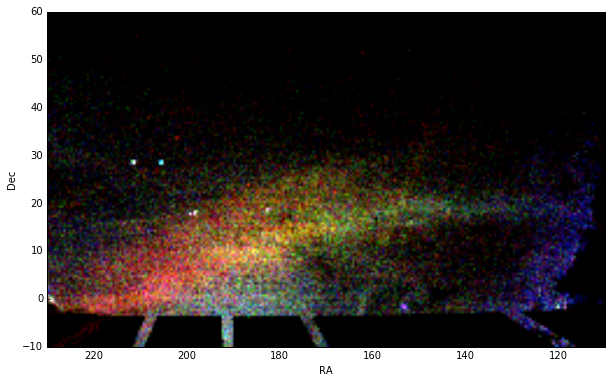

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.imshow(np.rot90(hrgb), aspect='auto', extent=[binDistX[0], binDistX[-1], binDistY[0], binDistY[-1]])
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.invert_xaxis()